In [1]:
from fastai.vision.all import *

In [2]:
path = "/content/drive/MyDrive/"

In [3]:
files = get_image_files("/content/drive/MyDrive/data_for_covid_patient")
len(files)

624

In [5]:
files[0].name

'NORMAL-115218-0001.jpeg'

In [8]:
pat = r'^([A-Za-z]+)'

In [9]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(224))

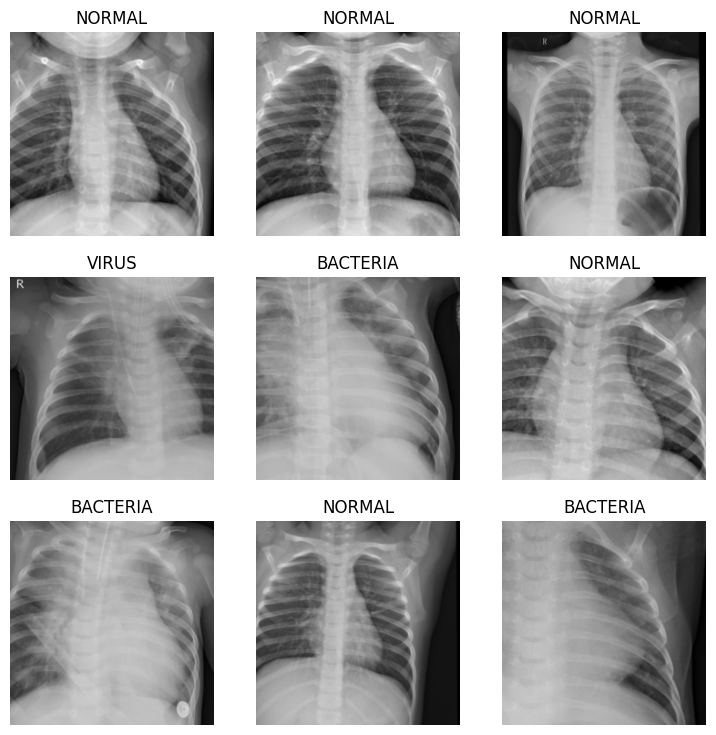

In [10]:
dls.show_batch()

In [11]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(460),
                                    batch_tfms=aug_transforms(size=224))

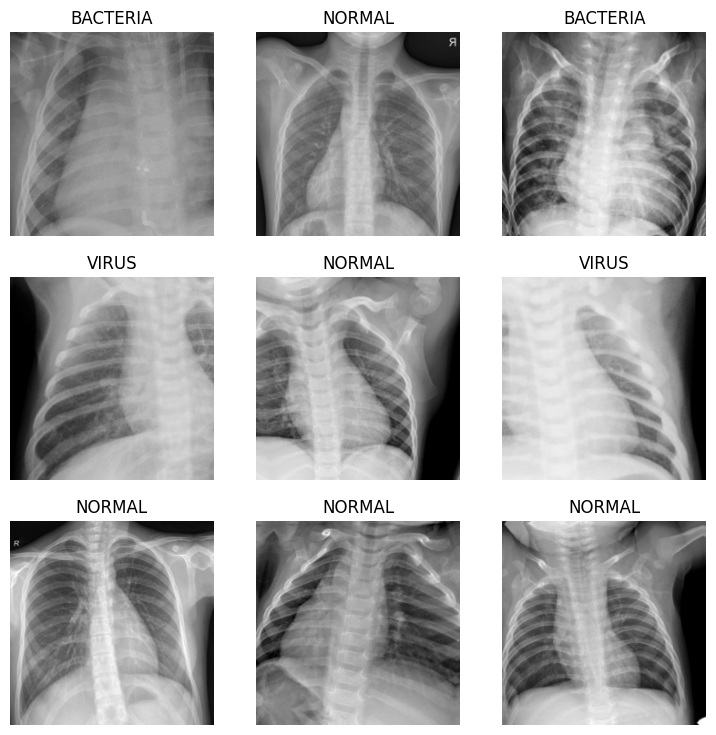

In [12]:
dls.show_batch()

In [13]:
learn = vision_learner(dls, resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 93.1MB/s]


SuggestedLRs(valley=0.0006918309954926372)

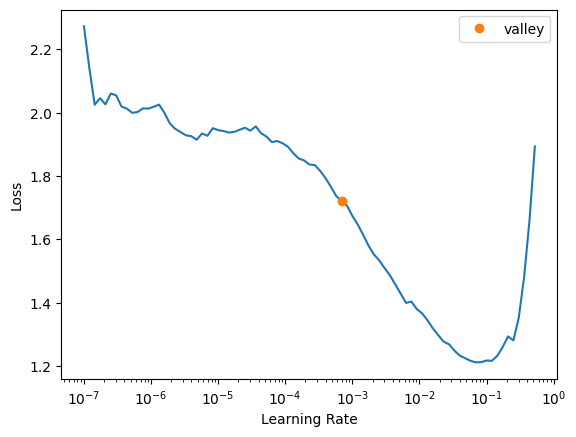

In [14]:
learn.lr_find()

In [16]:
learn.fine_tune(5, 3e-3)  # 5 = epochs and 3e-3 = learning rate

epoch,train_loss,valid_loss,error_rate,time
0,0.441383,1.330616,0.282258,00:17


epoch,train_loss,valid_loss,error_rate,time
0,0.358202,1.095193,0.282258,00:17
1,0.398819,0.932775,0.217742,00:20
2,0.409080,0.778217,0.169355,00:17
3,0.367117,0.738874,0.153226,00:17
4,0.353840,0.574676,0.112903,00:18


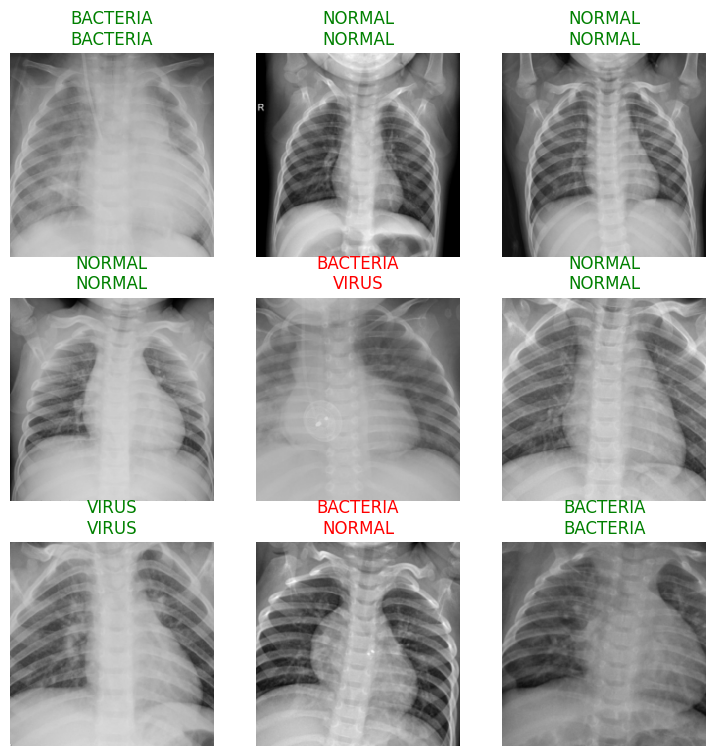

In [19]:
learn.show_results()

In [23]:
learn.predict("/content/abhisek.jpeg")

('VIRUS', tensor(2), tensor([0.0014, 0.0018, 0.9967]))